# Imports

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Generate data

Generate a small toy dataset from 3 multivariate Gaussians. Plot the data.

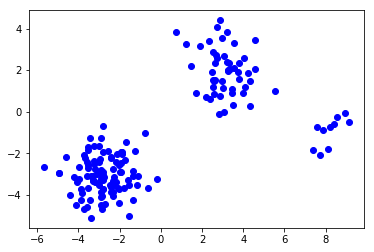

In [2]:
X = np.vstack((np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], 100),
               np.random.multivariate_normal([3, 2], [[1, 0], [0, 1]], 50),
               np.random.multivariate_normal([8, -1], [[1, 0], [0, 1]], 10)))
np.random.shuffle(X)

plt.figure()
plt.plot(X[:, 0], X[:, 1], 'o', color='blue')

We can clearly see the three clusters in the data. Let's call them: cluster 1, 2, and 3 for respectively the cluster with 100, 50, and 10 instances.

# Detect outliers

## iNNe

In [6]:
from anomatools.anomaly_detection import INNE

In [4]:
# construct detector and find outliers
detector = INNE(t=200, n=12)
y_score, y_pred = detector.fit_predict(X, None)

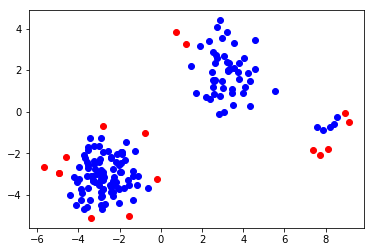

In [5]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)

## kNNo

In [7]:
from anomatools.anomaly_detection import KNNO

In [8]:
# construct detector and find outliers
detector = KNNO(k=10)
y_score, y_pred = detector.fit_predict(X, None)

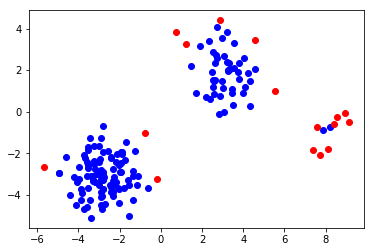

In [9]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)

## Unsupervised SSDO

In [10]:
from anomatools.anomaly_detection import SSDO

In [11]:
# construct detector and find outliers
detector = SSDO(alpha=2.3, k=16, unsupervised_prior='SSDO', contamination=0.1)
y_score, y_pred = detector.fit_predict(X)

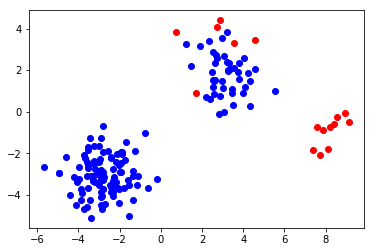

In [12]:
plt.figure()
for l in [-1, 1]:
    ix = np.where(y_pred == l)[0]
    c = 'red' if l == 1 else 'blue'
    plt.plot(X[ix, 0], X[ix, 1], 'o', color=c)